# **TRABAJO PARCIAL**

> Curso: APLICACIONES DE DATA SCIENCE

> Integrantes:
*   Puglisevich Vergara, Eduardo Elias (U20201E850)
*   Cano Chocce, Samuel Esteban (U202116508)
*   Nicolás Guerrero (U202115535)

> Seccion: CC92

# **ANALISIS EDA (Exploratory data analysis)**

##1. **Carga de datos**

Para este caso, hemos utilizado el metodo de web scrapping para la obtención de los datos, para acceder a la extracción de los datos ingresar al siguiente link: [Web scrapping notebook](https://colab.research.google.com/drive/1Yt9vrEaA3GQBf7s9B4i9pFDTrSiEkagI?usp=sharing)

In [ ]:
!pip install spacy
!python -m spacy download es

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.tokens import Token
import spacy

In [3]:
df_tesis = pd.read_csv("data_tesis.csv")

##2. **Inspección de datos**


In [4]:
df_tesis

,ID,Titulo,Autor/es,Resumen,Facultad,Carrera
0,0,Plataformas digitales y su participación en la...,"Nureña Yafac, Nicolás Alfonso; Gonzales Agüero...",El presente trabajo de investigación se titula...,Facultad de Administración en Hotelería y Turismo,Administracion de Hoteleria y Turismo
1,1,Innovación tecnológica en turismo receptivo ¿e...,"Nureña Yafac, Nicolás Alfonso; Figueroa Espino...",Los avances tecnológicos facilitan la accesibi...,Facultad de Administración en Hotelería y Turismo,Administracion de Hoteleria y Turismo
2,2,Análisis de la influencia del salario y la fle...,"Osorio Delgado, Carlos Ruben; Caldas Palacios,...",El presente trabajo de investigación tiene com...,Facultad de Administración en Hotelería y Turismo,Administracion de Hoteleria y Turismo
3,3,La influencia de Huallamarca en la identidad c...,"Nureña Yafac, Nicolás Alfonso; Espinoza Morale...",El presente trabajo tiene la finalidad de anal...,Facultad de Administración en Hotelería y Turismo,Administracion de Hoteleria y Turismo
4,4,Análisis de la influencia de la Gentrificación...,"Nureña Yafac, Nicolás Alfonso; De La Cruz Verg...",El presente trabajo aborda la influencia de la...,Facultad de Administración en Hotelería y Turismo,Administracion de Hoteleria y Turismo
...,...,...,...,...,...,...
6820,6820,Estado emocional de niños hospitalizados bajo ...,"Dreifuss, Daniel; Stenning Jacobs, Viera",La presente investigación describe el estado e...,Facultad de Psicología,Psicología
6821,6821,Adaptación de la escala Presor (the Perceived ...,"Gargurevich Liberti, Rafael Ernesto; García Ca...",La presente investigación tiene como objetivo ...,Facultad de Psicología,Psicología
6822,6822,Características de la producción de textos en ...,"Flórez Dyer, Carolina; Pereda Burga, Andrea Ga...",La educación intercultural bilingüe es un mode...,Facultad de Psicología,Psicología
6823,6823,Relación entre el malestar asociado a la sinto...,"Huamán Anccasi, Cristina",This study's main objective is to know the rel...,Facultad de Psicología,Psicología


In [5]:
#@title Vizualizamos 5 datos aleatorios del dataframe
df_tesis.sample(5)

,ID,Titulo,Autor/es,Resumen,Facultad,Carrera
5322,5322,La relación de las redes sociales y la lealtad...,"Carlos Miñano, Lourdes Milagros; Calderon Reye...",El concepto de lealtad de la marca ha sido sie...,Facultad de Negocios,Administración y Marketing
4366,4366,Gestión de una fábrica de software basada en l...,"Parasi Falcón, Víctor Manuel Juan Pablo; Barra...",La empresa virtual Java Software Factory fue f...,Facultad de Ingeniería,Ingeniería de Software
43,43,Los servicios ecosistémicos culturales reconoc...,"Rivas Medina, Ana Cecilia; Bravo Soto, Yaniree...",Los servicios ecosistémicos son los beneficios...,Facultad de Administración en Hotelería y Turismo,Turismo y Administración - GLION
5323,5323,Metodología ágil Scrum y su relación con la sa...,"Calvo Córdova, Juan Fernando; Munguia Matos, A...",La presente tesis posee un enfoque cuantitativ...,Facultad de Negocios,Administración y Marketing
5201,5201,Desarrollo del mercado de carne de cuy en Lima...,"Saravia Molina, Victor German; Ahumada Vásquez...",La presente investigación desarrolla una propu...,Facultad de Negocios,Administración y Agronegocios


De esta manera podemos visualizar que contamos con data con respecto a tesis de diferentes facultades y carreras, por cada tesis contamos con un ID, titulo, autores, resumen, facultad y carrera

In [6]:
#@title Vizualizamos nuestras columnas
i = 1
for c in df_tesis.columns:
  print(f"Columna {i}: {c}")
  i+=1

Columna 1: ID
Columna 2: Titulo
Columna 3: Autor/es
Columna 4: Resumen
Columna 5: Facultad
Columna 6: Carrera


In [7]:
#@title Vizualizamos los tipos de nuestros datos y observamos si hay datos nulos
# @markdown int64 -> enteros\
# @markdown object -> cadenas de texto
df_tesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        6825 non-null   int64 
 1   Titulo    6825 non-null   object
 2   Autor/es  6825 non-null   object
 3   Resumen   6156 non-null   object
 4   Facultad  6825 non-null   object
 5   Carrera   6825 non-null   object
dtypes: int64(1), object(5)
memory usage: 320.0+ KB


In [8]:
#@title Vizualizamos la frecuencia de los datos object
df_tesis.describe(include=["object"])

,Titulo,Autor/es,Resumen,Facultad,Carrera
count,6825,6825,6156,6825,6825
unique,6781,6799,6132,13,44
top,Asociación entre disfunción del suelo pélvico ...,Universidad Peruana de Ciencias Aplicadas (UPC),El proyecto está situado en las laderas al sur...,Facultad de Ingeniería,Arquitectura
freq,2,5,3,2308,1209


A partir de este analisis, podemos observar que existen más tesis de la facultad de ingeniería, con un total de 2308 tesis y que la carrera con más tesis en la UPC es la carrera de Arquitectura

##3. **Preprocesamiento de datos**

Para el trabajo en cuestion, las 4 columnas de interes son, el titulo, el resumen, la facultad y la carrera que pertencen a una tesis. Por ello, primero debemos eliminar todas aquellas tesis que no tengan un resumen, pues no aportaran información útil para el entrenamiento del modelo. Posteriormente, normalizaremos el texto de cada uno de los resumenes para preparar los datos.

In [9]:
#@title Creamos una copia del data set para limpiar los datos nulos
df_limpio = df_tesis.copy()

In [10]:
#@title Visualizamos cuantos datos nulos tenemos
df_limpio.isna().sum()

ID            0
Titulo        0
Autor/es      0
Resumen     669
Facultad      0
Carrera       0
dtype: int64

Observamos que el único campo que tiene valores nulos es Resumen, el cual es un dato de interes, por ende la mejor opción para que no afecte al entrenamiento del modelo sera eliminar todos las observaciones que cuenten con un resumen nulo.

In [11]:
#@title Eliminamos las observaciones con Resumen nulo
df_limpio.dropna(axis=0, inplace=True)

In [12]:
#@title Verificamos que no existan datos nulos
df_limpio.isna().sum()

ID          0
Titulo      0
Autor/es    0
Resumen     0
Facultad    0
Carrera     0
dtype: int64

In [13]:
#@title Cantidad de observaciones antes y despues
print(f"Cantidad de observaciones iniciales: {df_tesis.shape[0]}")
print(f"Cantidad de observaciones luego de eliminar nulos: {df_limpio.shape[0]}")

Cantidad de observaciones iniciales: 6825
Cantidad de observaciones luego de eliminar nulos: 6156


In [14]:
#@title Pasamos los datos de interés a listas
Titulo_list = df_limpio["Titulo"].values.tolist()
Resumen_list = df_limpio["Resumen"].values.tolist()
Facultad_list = df_limpio["Facultad"].values.tolist()
Carrera_list = df_limpio["Carrera"].values.tolist()

In [17]:
#@title Normalizamos los resumenes
nlp = spacy.load('es_core_news_sm')
def normalize(text):
  for i, res in enumerate(text):
    res = str(res)
    doc = nlp(res.lower())
    text[i] = " ".join([word.lemma_ for word in doc if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop) and (word.text.strip()!='') and (word.is_alpha)])
  return text

In [18]:
Resumen_list = normalize(Resumen_list)

In [19]:
#@title Revisamos cada uno de los resumenes
for i in range(len(Resumen_list)):
  print(f"TITULO: {Titulo_list[i]}")
  print(f"RESUMEN NORMALIZADO: {Resumen_list[i]}")

TITULO: Plataformas digitales y su participación en la ocupabilidad en hoteles 3 estrellas en Miraflores - Lima, 2018
RESUMEN NORMALIZADO: presente trabajo investigación titular plataforma digital participación ocupabilidad hotel estrella miraflor lima objetivo determinar plataforma digital participar ocupabilidad hotel categoría estrella miraflor distrito turístico lima enfoque cualitativo tipo investigación basado principalmente observación directo entrevista semiestructurada administrador hotel estrella miraflor turista funcionario sector hotelero especialista plataforma digital usuario plataforma digital hotelera obtener información actual escenario economía global local investigación sumo importancia sector hotelero lujo upscale ajeno plataforma beneficiar interacción atraer cliente potencial cliente basar elección reserva información imagen video alto calidad detalle presentar habitación área hotel visualizar web evitar intermediario
TITULO: Innovación tecnológica en turismo rece

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




TITULO: Aplicación de la voladura de pre-corte en las labores de desarrollo de la mina MARSA para la reducir la sobrerotura en el macizo rocoso
RESUMEN NORMALIZADO: presente tesis estudiar aplicación técnica voladura galería desarrollo mina subterráneo marso reducir sobrerotura macizo rocoso efecto considerar aporte brindar disciplina geomecánica geología perforación voladura investigación llevar cabo cordillera oriental andes norte perú provincia pataz batolito pataz yacimiento tipo orogénico asociado proceso metamorfismo caracterizado veta aurífera específicamente área influencia actividad unidad minero san andrés voladura obtener estabilidad labor desarrollo dar consecuencia reducción sobrerotura macizo rocoso realizar estudio geomecánico designar tipo roca zona malla perforación adecuado selección explosivo adecuado asegurar afectar macizo rocoso comparación costo involucrado diseño voladura convencional contraste voladura teórico cuantitativo demostrar aplicación voladura reducir

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##4. **Visualización de datos**

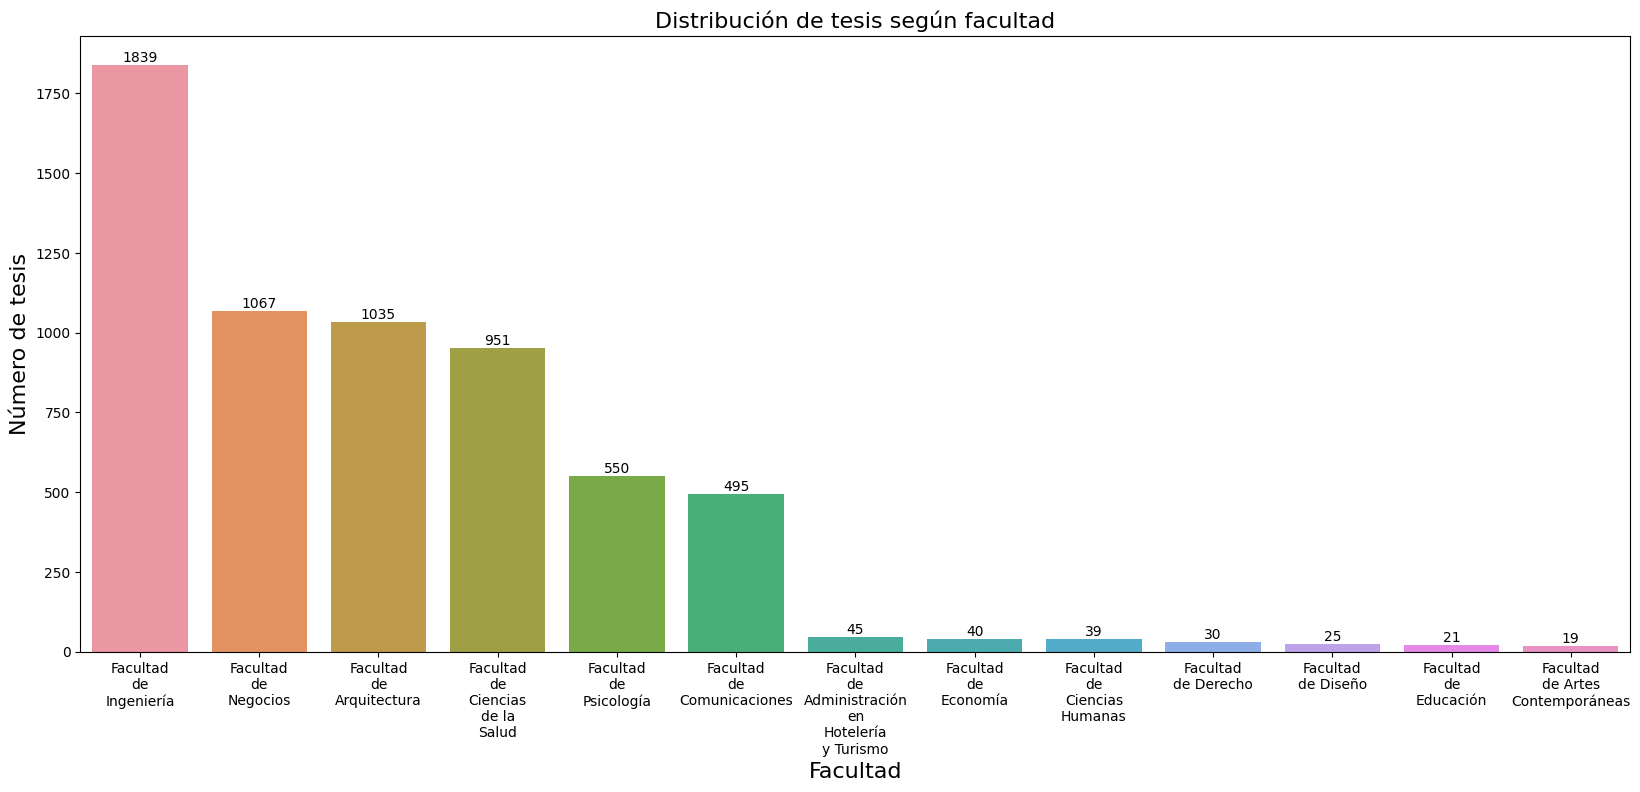

In [20]:
#@title Distribución de tesis según facultad
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=df_limpio,x="Facultad",order = df_limpio['Facultad'].value_counts().index)
ax.set_title("Distribución de tesis de pregrado según facultad",fontsize=16)
ax.set_ylabel("Número de tesis", fontsize=16)
ax.set_xlabel("Facultad", fontsize=16)
wrap_labels(ax,10)
ax.bar_label(container=ax.containers[0], labels=df_limpio['Facultad'].value_counts().values)
plt.show()

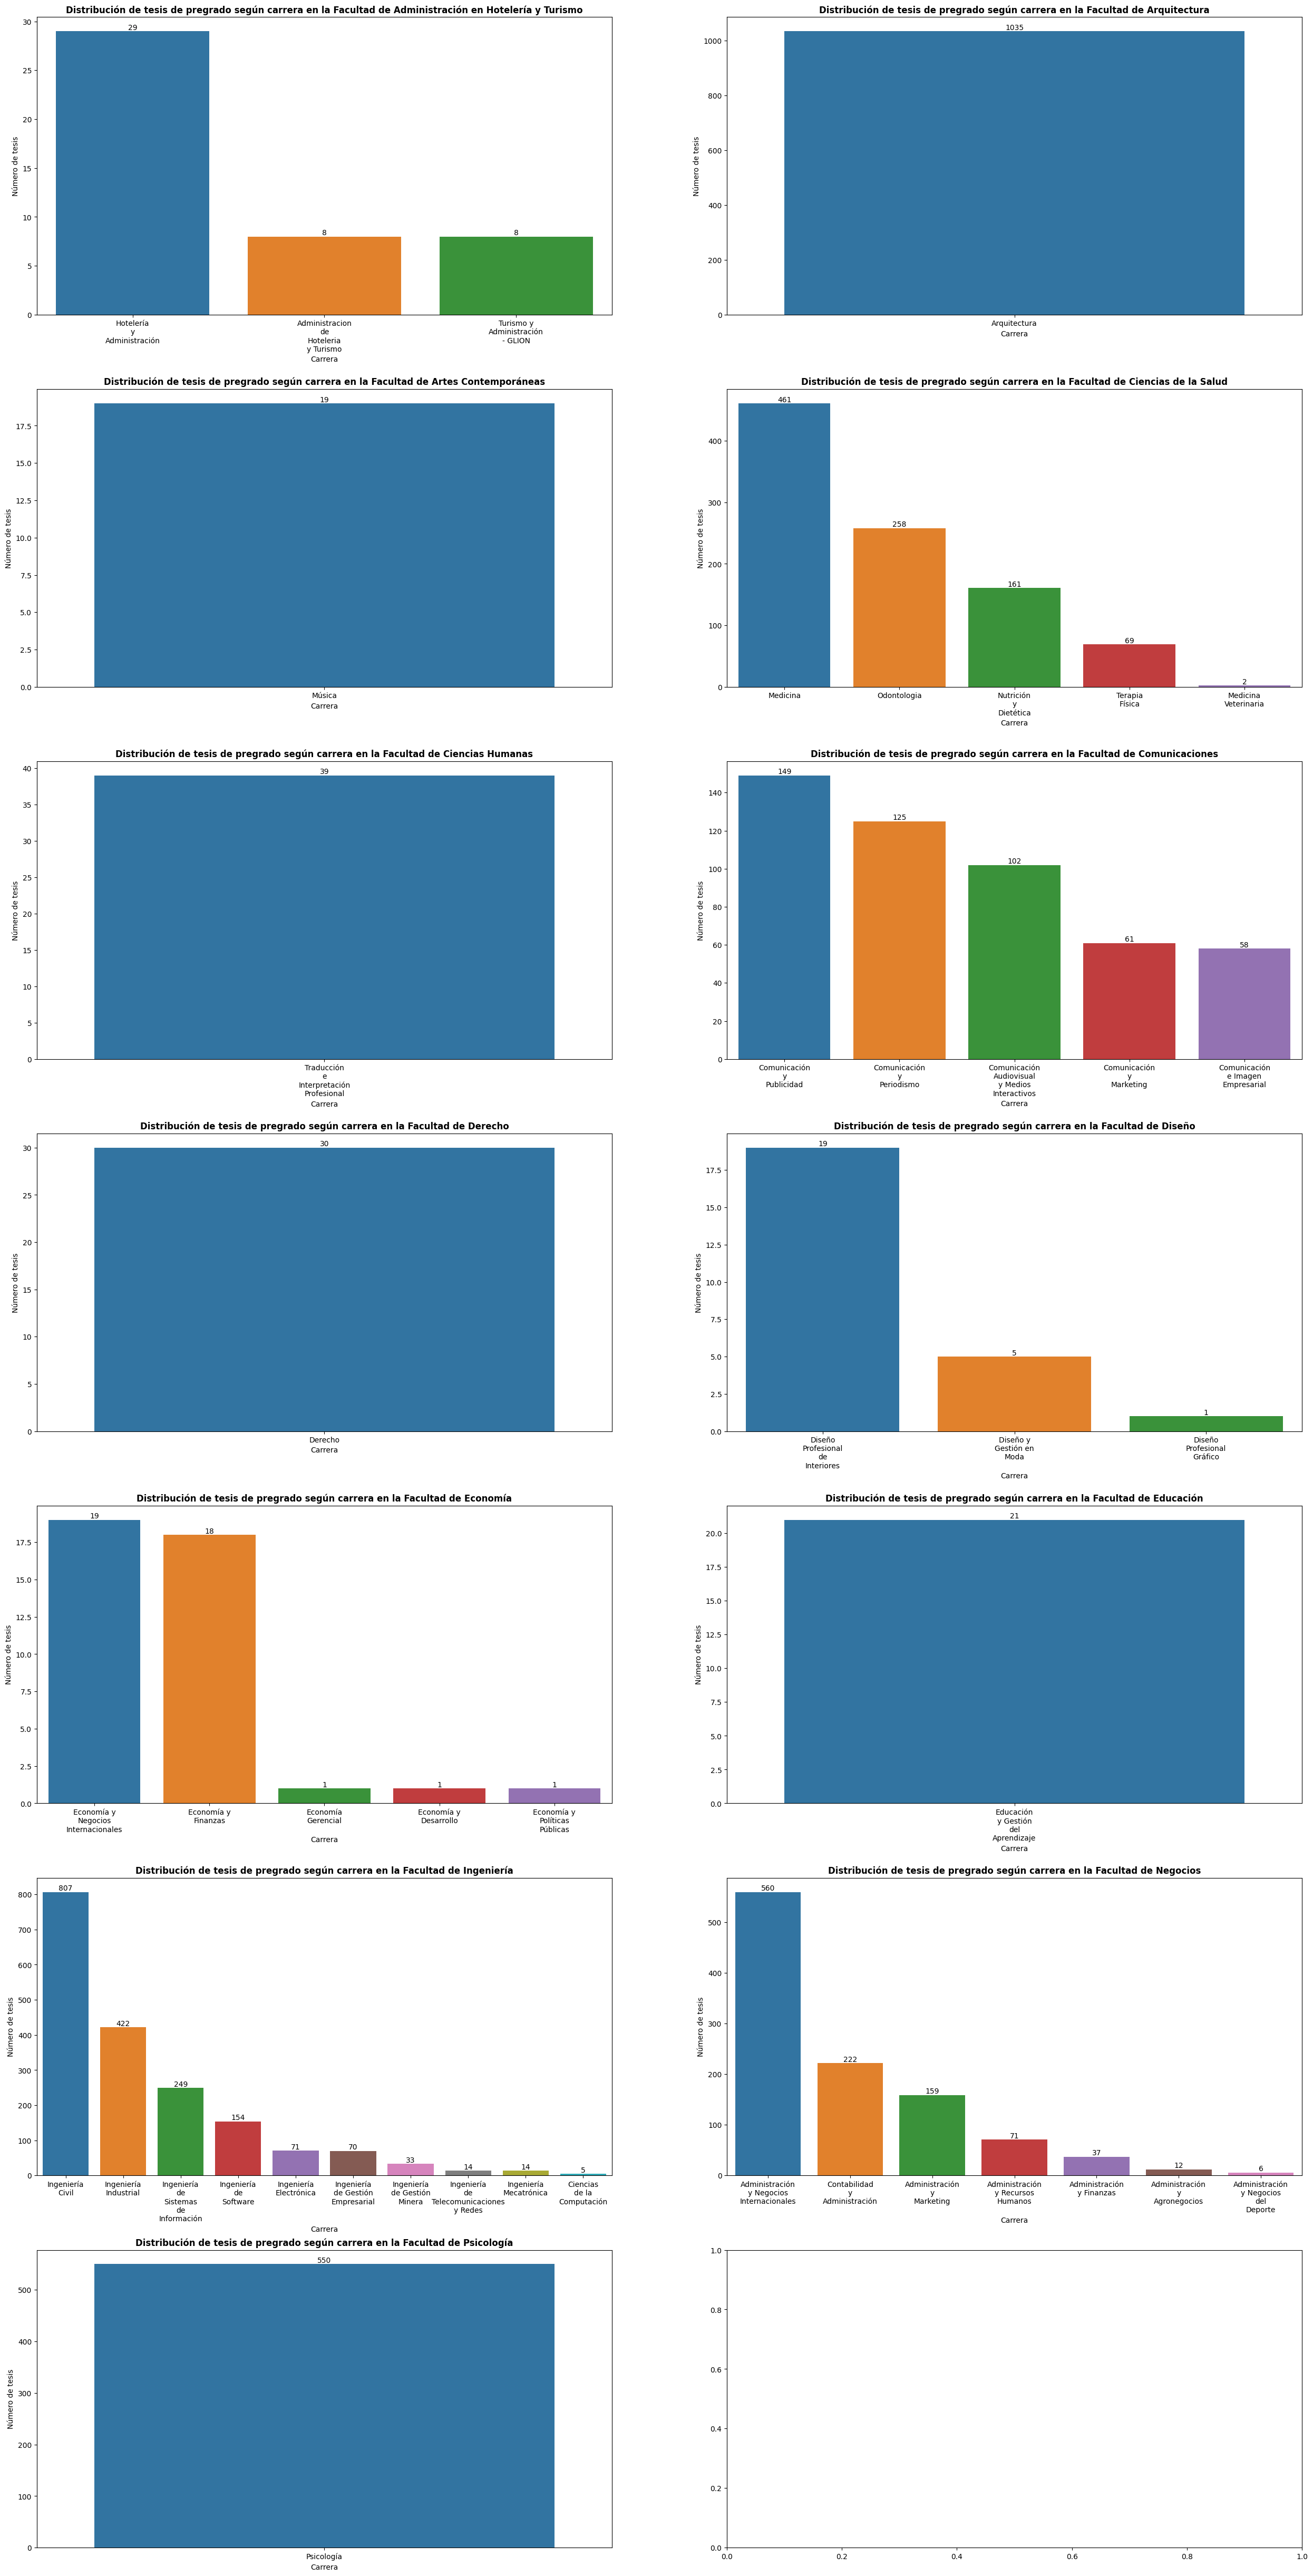

In [26]:
#@title Distribución de tesis según carrera
fig, ax = plt.subplots(7,2,figsize=(30,60))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.25)
ul = list(df_limpio['Facultad'].unique())
for i in range(7):
  for j in range(2):
    if (i == 6 and j == 1):
      break
    f=ul[i*2+j]
    df_aux = df_limpio[df_limpio['Facultad']==f]
    sns.countplot(data=df_aux,x="Carrera",order = df_aux['Carrera'].value_counts().index, ax=ax[i][j])
    ax[i][j].set_title(f"Distribución de tesis de pregrado según carrera en la {f}",fontweight='bold')
    wrap_labels(ax[i][j],10)
    ax[i][j].bar_label(container=ax[i][j].containers[0], labels=df_aux['Carrera'].value_counts().values)
    ax[i][j].set_ylabel("Número de tesis", fontsize=10)
    ax[i][j].set_xlabel("Carrera", fontsize=10)
plt.show()

In [ ]:
#@title ONE-HOT-ENCODE BOW
import gensim
aux_list = [x.split() for x in Resumen_list]
dic = gensim.corpora.Dictionary(aux_list)
vectors = [[(token[0], 1) for token in dic.doc2bow(doc)] for doc in aux_list]
print('Diccionario de palabras ONE HOT ENCODE-> palabra: id')
print(dic.token2id)
print('\nApariciones de las palabras en los documentos (id, 1):')
for i,v in enumerate(vectors):
  print(f"Documento {i+1}: {v}")

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer()
corpus = vectorizer.fit_transform(Resumen_list)
v = corpus.toarray()
# Resultados
names=list(vectorizer.get_feature_names_out())
count = list(v.sum(axis=0))
df_token = pd.DataFrame(columns = ["Token","Conteo"])
df_token["Token"]=names
df_token["Conteo"]=count
df_token.sort_values("Conteo",ascending=False)

,Token,Conteo
14454,investigación,6074
20967,proyecto,4435
10113,estudio,4394
18071,objetivo,3986
22516,resultado,3955
...,...,...
9316,endodonciar,1
9314,endodiscriminación,1
19355,performs,1
9313,endocérvix,1


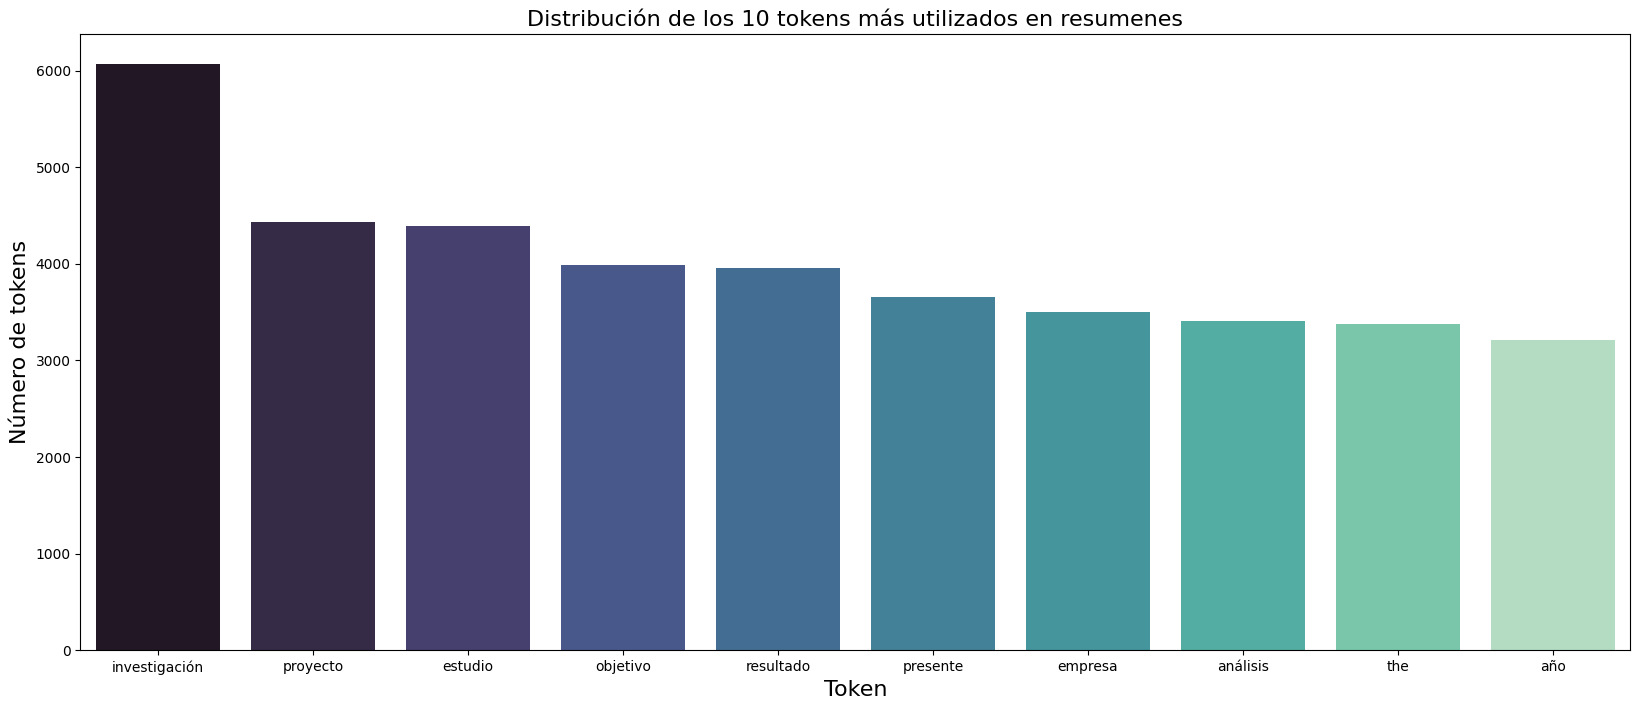

In [49]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=df_token.sort_values("Conteo",ascending=False)[:10],x="Token",y="Conteo", palette = 'mako')
ax.set_title("Distribución de los 10 tokens más utilizados en resumenes",fontsize=16)
ax.set_ylabel("Número de tokens", fontsize=16)
ax.set_xlabel("Token", fontsize=16)
plt.show()